In [40]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import cv2

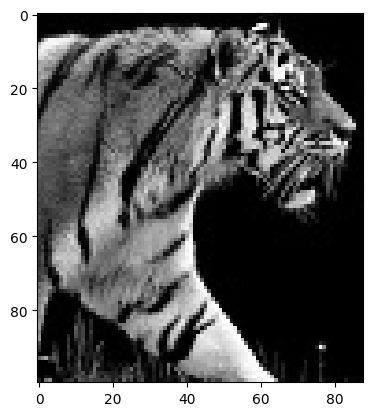

In [41]:
picture1 = cv2.imread("./img4.jpg")
picture1 = cv2.cvtColor(picture1, cv2.COLOR_BGR2GRAY)
plt.imshow(picture1, cmap="gray")

In [42]:
picture1

array([[  2,   2,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       ...,
       [  1,   1,   2, ...,   0,   0,   0],
       [  0,   1,  17, ...,   0,   1,   0],
       [ 36,   1, 113, ...,   5,   0,   1]], dtype=uint8)

In [43]:
picture1.shape

(100, 88)

In [44]:
input_array=picture1.reshape(-1)

In [45]:
len(input_array)

8800

In [46]:
input_array

array([2, 2, 1, ..., 5, 0, 1], dtype=uint8)

In [47]:
class kmeans:
    def __init__(self,n_classes):
        self.number_of_classes=n_classes
        self.max_iter=1000
        self.tolorance=1e-8

    def fit(self,x):
        self.random_center_index=np.random.choice(range(len(x)),16)
        self.random_center=x[self.random_center_index]
        self.picture=x
        for j in range(self.max_iter):
            self.clustered=[[] for i in range(16)]
            for i in range(8800):
                distance=np.abs(self.random_center-x[i])
                minimum_index=np.argmin(distance)
                self.clustered[minimum_index].append(x[i])
            for i in range(16):
                self.random_center[i]=np.mean(self.clustered[i], axis=0)
        for i in range(8800):
            distance=np.abs(self.random_center-x[i]*np.ones(16))
            minimum_index=np.argmin(distance)
            self.picture[i]=self.random_center[minimum_index]

In [48]:
model=kmeans(16)

In [49]:
model.fit(input_array)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [51]:
picture2=model.picture.reshape(100,88)

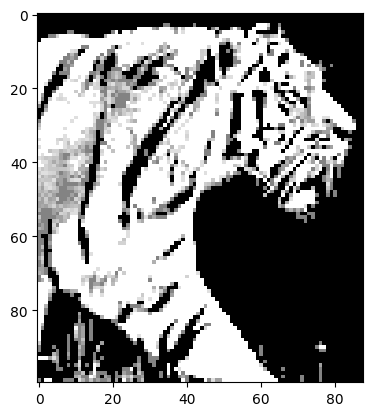

In [53]:
plt.imshow(picture2, cmap="gray")